In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
df = pd.read_csv('week 4 - Nashville_housing_data.csv')
df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [80]:
df.dtypes

Unnamed: 0                             int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                     float64
Property City                         object
Sale Date                             object
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Year Built                             int64
Exterior Wall                         object
Grade                                 object
Bedrooms  

In [82]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [83]:
#Dropping Column Suite/Condo as no data is available
df = df.drop(columns=['Suite/ Condo   #'], axis=1)

In [84]:
#Since less than 1% of data has null values, dropping them won't affect out Data Quality
df=df.dropna()

In [85]:
#Dropping Columns Irrelevant 
df = df.drop(columns=['Unnamed: 0','Parcel ID','Legal Reference','Property City'], axis=1)

In [86]:
df["Sold As Vacant"].value_counts()

No     22402
Yes      134
Name: Sold As Vacant, dtype: int64

In [87]:
df["Multiple Parcels Involved in Sale"].value_counts()

No     22069
Yes      467
Name: Multiple Parcels Involved in Sale, dtype: int64

In [88]:
df["Tax District"].value_counts()

URBAN SERVICES DISTRICT      17411
GENERAL SERVICES DISTRICT     3853
CITY OF OAK HILL               348
CITY OF FOREST HILLS           345
CITY OF GOODLETTSVILLE         344
CITY OF BELLE MEADE            214
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

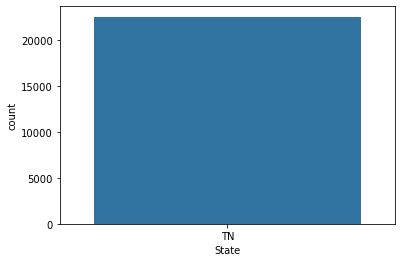

In [89]:
sns.countplot(x='State', data=df)

In [90]:
#As the Data is from a single state TN, We can drop the column and columns irrelevant to the study
df = df.drop(columns=['State','Property Address','Sale Date','Year Built'], axis=1)

In [91]:
df

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,No,No,ANTIOCH,0.38,URBAN SERVICES DISTRICT,6328,25000,105000,1758.00000,CRAWL,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,SINGLE FAMILY,No,No,ANTIOCH,0.27,URBAN SERVICES DISTRICT,6328,25000,142400,2421.00000,SLAB,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,SINGLE FAMILY,No,No,ANTIOCH,0.23,URBAN SERVICES DISTRICT,6328,25000,159300,3117.00000,SLAB,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,SINGLE FAMILY,No,No,NASHVILLE,0.15,URBAN SERVICES DISTRICT,126,40000,204100,1637.00000,CRAWL,FRAME,B,3.0,2.0,1.0,Over


In [92]:
#Exploring Categorical Variables
df["Land Use"].value_counts()

SINGLE FAMILY             21282
DUPLEX                     1184
RESIDENTIAL COMBO/MISC       36
QUADPLEX                     34
Name: Land Use, dtype: int64

In [93]:
#As Duplex and Quadplex comes under Residential Properties we group them under residential combo
df['Land Use']=np.where(df['Land Use'] =='DUPLEX', 'RESIDENTIAL COMBO/MISC', df['Land Use'])
df['Land Use']=np.where(df['Land Use'] =='QUADPLEX', 'RESIDENTIAL COMBO/MISC', df['Land Use'])
df["Land Use"].value_counts()

SINGLE FAMILY             21282
RESIDENTIAL COMBO/MISC     1254
Name: Land Use, dtype: int64

In [94]:
df["City"].value_counts()

NASHVILLE         17926
MADISON            1145
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         797
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: City, dtype: int64

In [95]:
df["Foundation Type"].value_counts()

CRAWL        14148
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
PIERS           36
TYPICAL          2
Name: Foundation Type, dtype: int64

In [96]:
#PIERS and TYPICAL Foundation Type comes under CRAWL Foundation Type
df['Foundation Type']=np.where(df['Foundation Type'] =='PIERS', 'CRAWL', df['Foundation Type'])
df['Foundation Type']=np.where(df['Foundation Type'] =='TYPICAL', 'CRAWL', df['Foundation Type'])
df["Foundation Type"].value_counts()

CRAWL        14186
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
Name: Foundation Type, dtype: int64

In [97]:
df["Grade"].value_counts()

C       16162
B        3375
D        1911
A         547
X         482
E          57
SSC         1
OFB         1
Name: Grade, dtype: int64

In [98]:
df['Grade']=np.where(df['Grade'] =='SSC', 'E', df['Grade'])
df['Grade']=np.where(df['Grade'] =='OFB', 'E', df['Grade'])
df["Grade"].value_counts()

C       16162
B        3375
D        1911
A         547
X         482
E          57
SSC         1
OFB         1
Name: Grade, dtype: int64

<AxesSubplot:xlabel='Sale Price Compared To Value', ylabel='count'>

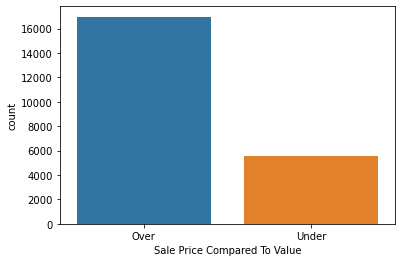

In [99]:
sns.countplot(x='Sale Price Compared To Value', data=df)

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

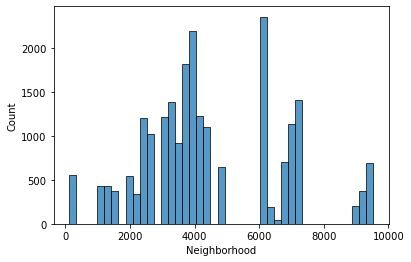

In [100]:
sns.histplot(x='Neighborhood', data=df)

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Building Value'>

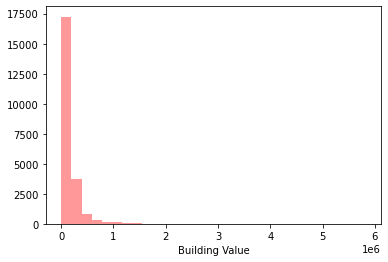

In [101]:
sns.distplot(df['Building Value'], kde = False, color ='red', bins = 30)

<AxesSubplot:xlabel='Land Value'>

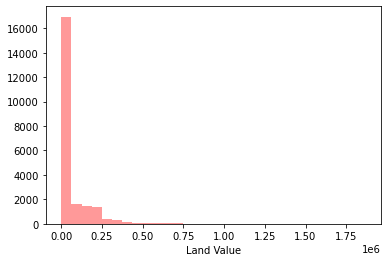

In [102]:
sns.distplot(df['Land Value'], kde = False, color ='red', bins = 30)

In [103]:
df["Exterior Wall"].value_counts()

BRICK          11512
FRAME           8098
BRICK/FRAME     2217
STONE            328
STUCCO           156
FRAME/STONE      104
CONC BLK          99
LOG               15
METAL              7
Name: Exterior Wall, dtype: int64

In [105]:
df.dtypes

Land Use                              object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
Acreage                              float64
Tax District                          object
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Price Compared To Value          object
dtype: object

In [106]:
df = pd.get_dummies(df, columns=['Sale Price Compared To Value'],drop_first=True, dummy_na=False)


array([[<AxesSubplot:title={'center':'Acreage'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Land Value'}>],
       [<AxesSubplot:title={'center':'Building Value'}>,
        <AxesSubplot:title={'center':'Finished Area'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>],
       [<AxesSubplot:title={'center':'Full Bath'}>,
        <AxesSubplot:title={'center':'Half Bath'}>,
        <AxesSubplot:title={'center':'Sale Price Compared To Value_Under'}>]],
      dtype=object)

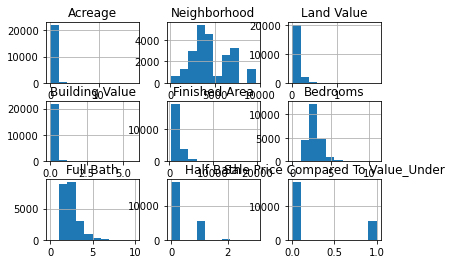

In [163]:
df.hist()

<AxesSubplot:>

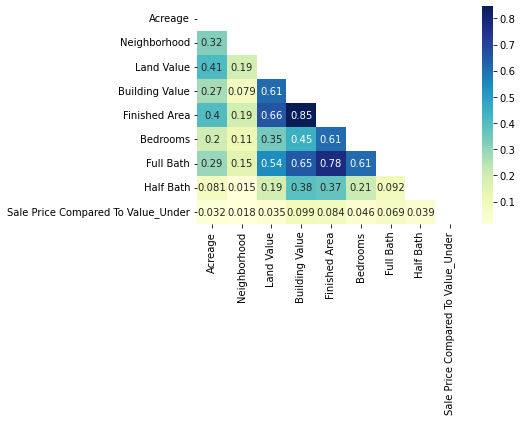

In [107]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True, mask=mask)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4ea3d93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4ea3d9970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4ea3d9100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4ea3d9f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4ea3e7220>],
 'means': []}

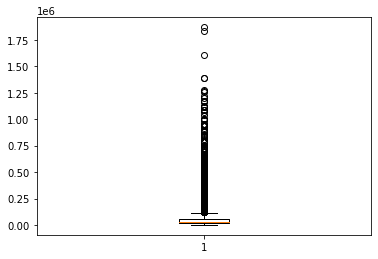

In [108]:
plt.boxplot(df['Land Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4f03a48e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4f03a4e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4f03a4610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4f03b4460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4f03b4730>],
 'means': []}

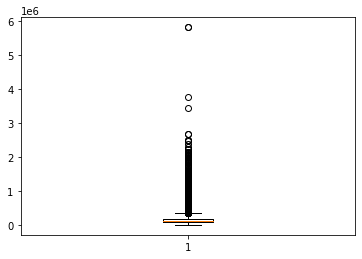

In [164]:
plt.boxplot(df['Building Value'])

In [109]:
#hot Encoding
df1 = pd.get_dummies(df, columns=['Land Use','Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'Tax District', 'Foundation Type', 'Exterior Wall','Grade'], drop_first=True, dummy_na=False)



In [110]:
duplicates = df1.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 1455


In [111]:
df1.drop_duplicates()

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value_Under,Land Use_SINGLE FAMILY,...,Exterior Wall_METAL,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,0.17,3127,32000,134400,1149.00000,2.0,1.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.11,9126,34000,157800,2090.82495,3.0,2.0,1.0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.17,3130,25000,243700,2145.60001,4.0,2.0,0.0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0.34,3130,25000,138100,1969.00000,2.0,1.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0.17,3130,25000,86100,1037.00000,2.0,1.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,0.24,6328,22000,74500,1311.00000,3.0,2.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22646,0.38,6328,25000,105000,1758.00000,3.0,2.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22647,0.27,6328,25000,142400,2421.00000,3.0,3.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
22648,0.23,6328,25000,159300,3117.00000,3.0,3.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [112]:
rank = np.linalg.matrix_rank(df1.values)

# Check if the rank is equal to the number of columns
if rank < df1.shape[1]:
    print("The dataframe has linearly dependent rows.")
else:
    print("The dataframe does not have linearly dependent rows.")

The dataframe does not have linearly dependent rows.


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [137]:
y_logr=df1[['Sale Price Compared To Value_Under']]
x_logr=df1.drop(['Sale Price Compared To Value_Under'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.40)

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logreg = LogisticRegression()

logreg.fit(x_train,z_train)
z_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
cnf_matrix
# model.score(x_test, z_test)

         Current function value: inf
         Iterations: 35
                                   Logit Regression Results                                   
Dep. Variable:     Sale Price Compared To Value_Under   No. Observations:                13521
Model:                                          Logit   Df Residuals:                    13476
Method:                                           MLE   Df Model:                           44
Date:                                Sun, 05 Feb 2023   Pseudo R-squ.:                     inf
Time:                                        21:05:09   Log-Likelihood:                   -inf
converged:                                      False   LL-Null:                        0.0000
Covariance Type:                            nonrobust   LLR p-value:                     1.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting

array([[6787,   19],
       [2187,   22]])

In [138]:
class_report = classification_report(z_test, z_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6806
           1       0.54      0.01      0.02      2209

    accuracy                           0.76      9015
   macro avg       0.65      0.50      0.44      9015
weighted avg       0.70      0.76      0.65      9015



In [140]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(x_train,z_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [141]:
#Accuracy
z_predict = dt_model.predict(x_test)
accuracy_score(z_test,z_predict)

0.7585135884636717

In [142]:
print(confusion_matrix(z_test, z_predict))
print(classification_report(z_test, z_predict))

[[6779   27]
 [2150   59]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6806
           1       0.69      0.03      0.05      2209

    accuracy                           0.76      9015
   macro avg       0.72      0.51      0.46      9015
weighted avg       0.74      0.76      0.66      9015



In [143]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=x_logr.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("housing_decision_tree")


'housing_decision_tree.pdf'

In [144]:
#Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)
feat_dict= {}
for col, val in sorted(zip(x_train.columns, dt_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,Sold As Vacant_Yes,0.338010
1,Building Value,0.284521
2,Land Value,0.237103
3,Neighborhood,0.051547
4,Bedrooms,0.044903
5,Foundation Type_SLAB,0.030452
6,Finished Area,0.005822
7,Acreage,0.004040
8,Full Bath,0.003601
9,Half Bath,0.000000


In [145]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,z_train)

/var/folders/0n/4y67mytn7gx0m219_th1k1jw0000gn/T/ipykernel_1134/3981944006.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,z_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [146]:
zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)

0.760177481974487

In [147]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))

[[6801    5]
 [2157   52]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6806
           1       0.91      0.02      0.05      2209

    accuracy                           0.76      9015
   macro avg       0.84      0.51      0.45      9015
weighted avg       0.80      0.76      0.66      9015



In [148]:
#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feat_dict1= {}
for col, val in sorted(zip(x_train.columns, rf_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict1[col]=val
feat_df1 = pd.DataFrame({'Feature':feat_dict1.keys(),'Importance':feat_dict1.values()})
feat_df1

,Feature,Importance
0,Sold As Vacant_Yes,0.201906
1,Building Value,0.129893
2,Finished Area,0.115582
3,Land Value,0.115258
4,Full Bath,0.089107
5,Acreage,0.052827
6,Grade_C,0.046790
7,Neighborhood,0.042939
8,City_MADISON,0.035969
9,Bedrooms,0.026479


Feature ranking:
1. feature 9 (0.000000)
2. feature 3 (0.000000)
3. feature 4 (0.000000)
4. feature 2 (0.000000)
5. feature 6 (0.000000)
6. feature 0 (0.000068)
7. feature 38 (0.000423)
8. feature 1 (0.000489)
9. feature 15 (0.000507)
10. feature 5 (0.000552)
11. feature 43 (0.000894)
12. feature 7 (0.000990)
13. feature 25 (0.001674)
14. feature 40 (0.001869)
15. feature 31 (0.001931)
16. feature 10 (0.002066)
17. feature 17 (0.002738)
18. feature 8 (0.003160)
19. feature 18 (0.003393)
20. feature 36 (0.003591)
21. feature 37 (0.003709)
22. feature 13 (0.003954)
23. feature 23 (0.004004)
24. feature 28 (0.004940)
25. feature 24 (0.005253)
26. feature 39 (0.006145)
27. feature 29 (0.006354)
28. feature 21 (0.006964)
29. feature 27 (0.007335)
30. feature 32 (0.007540)
31. feature 35 (0.010641)
32. feature 26 (0.010773)
33. feature 22 (0.016469)
34. feature 14 (0.024826)
35. feature 30 (0.026479)
36. feature 12 (0.035969)
37. feature 11 (0.042939)
38. feature 16 (0.046790)
39. feature 33

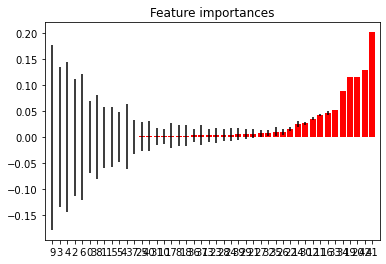

In [151]:
importances_rf = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices_rf = np.argsort(importances_rf)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances_rf[indices], color="r", yerr=std[indices_rf], align="center")
plt.xticks(range(x_train.shape[1]), indices_rf)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [154]:
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,z_train)

/Users/omkarsadekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=4, random_state=42)

In [155]:
#Accuracy

zgb_predict = gb_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zgb_predict)

0.7605102606766501

In [156]:
print(confusion_matrix(z_test, zgb_predict))
print(classification_report(z_test, zgb_predict))

[[6718   88]
 [2071  138]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      6806
           1       0.61      0.06      0.11      2209

    accuracy                           0.76      9015
   macro avg       0.69      0.52      0.49      9015
weighted avg       0.73      0.76      0.68      9015



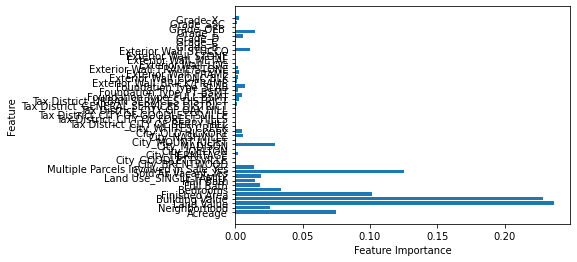

In [158]:
importances_gbc = gbc.feature_importances_
feature_names = x_train.columns

# Normalize the importances to add up to 1
importances_gbc = importances_gbc / importances_gbc.sum()

# Plot the feature importances
plt.barh(feature_names, importances_gbc)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [160]:
#Feature Importance
importances_gbc = gbc.feature_importances_
indices_gbc = np.argsort(importances)
feat_dict2= {}
for col, val in sorted(zip(x_train.columns, gb_model.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict2[col]=val
feat_df2 = pd.DataFrame({'Feature':feat_dict2.keys(),'Importance':feat_dict2.values()})
feat_df2

,Feature,Importance
0,Building Value,0.219198
1,Land Value,0.180379
2,Finished Area,0.130684
3,Acreage,0.099888
4,Sold As Vacant_Yes,0.093019
5,Neighborhood,0.046265
6,Bedrooms,0.031403
7,Full Bath,0.026126
8,Land Use_SINGLE FAMILY,0.026083
9,City_MADISON,0.020755
